# Creation of a Neural Network with Augmented Image

Hello everyone, today I want to create  a new neural network model, where the source data will be augmented and trained with this input.
What I want to modify to the source image is remove the unecessary data from the source . ie, perform a segmentation of the image that is relevant to the neural network. 

Due to our scope fo the moment is the autowalking in the MMORPG-AI game we want t to focus on the way.






In [1]:
# Neural Networks
from keras.models import Sequential
from keras.layers import Dense

In [2]:
#Importing library
# Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD

In [3]:
#Helper functions about mmorpg-ai project
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import io
from IPython.display import clear_output, Image, display
import PIL.Image
from matplotlib import pyplot as plt
import logging, sys
logging.disable(sys.maxsize)
import os

def df_to_numpy_image(df_image_clean,index):
    #select the row with index label 'index'
    image_clean=df_image_clean.loc[[index]].T.to_numpy()
    lists =image_clean.tolist()
    # Nested List Comprehension to flatten a given 2-D matrix
    # 2-D List
    matrix = lists
    flatten_matrix = [val.tolist() for sublist in matrix for val in sublist]
    # converting list to array
    arr = np.array(flatten_matrix)
    return arr
def df_to_numpy_input(df_input,index): 
    # flattening a 2d numpy array
    # into 1d array
    # and remove dtype at the end of numpy array
    lista=df_input.loc[[index]].values.tolist()
    arr=np.array(lista).ravel()
    return arr
#round a float up to next even number
import math
def roundeven(f):
    return math.ceil(f / 2.) * 2


In [4]:
#We define the parameters
width= 480
height= 270
ncolors=3
#Normalization Parameter
Norma        = 29/1000
#Paramters                          Operation 
filters1     =  roundeven(96*Norma)   #1
kernel1      =  11       
stride1      =  4
kernel2      =  3                     #2
stride2      =  2
filters3     =  roundeven(256*Norma)  #3
kernel3      =  5
kernel4      =  3                     #4
stride4      =  2
filters5     =  roundeven(384*Norma)  #5
kernel5      =  3
filters6     =  roundeven(384*Norma)  #6
kernel6      =  3
filters7     =  roundeven(256*Norma)  #7
kernel7      =  3
kernel8      =  3                      #8
stride8      =  2 
units1       =  16                    #9
units2       =  8                     #10
units3       =  1024                  #11
dropout1     =  0.75
dropout2     =  0.5
dropout3     =  0.75
learning_rate17= 0.0008

In [5]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [8]:
#We load the datasets to work
import os
user = "ruslanmv"
repo = "Neural-Networks-from-Scratch"
# remove local directory if it already exists
if os.path.isdir(repo):
    !rm -rf {repo}
!git clone https://github.com/{user}/{repo}.git

Cloning into 'Neural-Networks-from-Scratch'...
Updating files:  66% (37/56)
Updating files:  67% (38/56)
Updating files:  69% (39/56)
Updating files:  71% (40/56)
Updating files:  73% (41/56)
Updating files:  75% (42/56)
Updating files:  76% (43/56)
Updating files:  78% (44/56)
Updating files:  80% (45/56)
Updating files:  82% (46/56)
Updating files:  83% (47/56)
Updating files:  85% (48/56)
Updating files:  87% (49/56)
Updating files:  89% (50/56)
Updating files:  91% (51/56)
Updating files:  92% (52/56)
Updating files:  94% (53/56)
Updating files:  96% (54/56)
Updating files:  98% (55/56)
Updating files: 100% (56/56)
Updating files: 100% (56/56), done.


In [6]:
input_shape=(height, width, ncolors)

In [7]:
(height, width, ncolors)

(270, 480, 3)

In [8]:
# Function to create model MmoNet
def create_model(optimizer='adam',lr=0.1, momentum=0):
    # create model
    MmoNet = Sequential()
    MmoNet.add(Conv2D(filters=filters1, input_shape=(height, width, ncolors), kernel_size=(11,11), strides=(stride1,stride1), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel2,kernel2), strides=(stride2,stride2), padding='same'))
    MmoNet.add(Conv2D(filters=filters3, kernel_size=(kernel3, kernel3), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel4,kernel4), strides=(stride4,stride4), padding='same'))
    #3rd Convolutional Layer
    MmoNet.add(Conv2D(filters=filters5, kernel_size=(kernel5,kernel5), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #4th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters6, kernel_size=( kernel6, kernel6), padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #5th Convolutional Layer
    MmoNet.add(Conv2D(filters=filters7, kernel_size=(kernel7,kernel7),  padding='same'))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    MmoNet.add(MaxPooling2D(pool_size=(kernel8,kernel8), strides=(stride8,stride8), padding='same'))
    #Passing it to a Fully Connected layer
    MmoNet.add(Flatten())
    # 1st Fully Connected Layer
    MmoNet.add(Dense(units1, input_shape=(270, 480, 3,)))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    # Add Dropout to prevent overfitting
    MmoNet.add(Dropout(dropout1))
    #2nd Fully Connected Layer
    MmoNet.add(Dense(units2))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout2))
    #3rd Fully Connected Layer
    MmoNet.add(Dense(units3))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('relu'))
    #Add Dropout
    MmoNet.add(Dropout(dropout3))
    #Output Layer
    MmoNet.add(Dense(29))
    MmoNet.add(BatchNormalization())
    MmoNet.add(Activation('softmax'))

    # Compile model
    optimizer = SGD(lr=lr, momentum=momentum)
    

    MmoNet.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return MmoNet

In [9]:
model = create_model()

C:\Anaconda3\envs\pygta5\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 68, 120, 4)        1456      
                                                                 
 batch_normalization (BatchN  (None, 68, 120, 4)       16        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 68, 120, 4)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 34, 60, 4)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 60, 8)         808       
                                                                 
 batch_normalization_1 (Batc  (None, 34, 60, 8)        3

# Augmentation Part

In [11]:
# importing cv2 and numpy library
import cv2
import numpy as np

In [12]:
def showarray(a, fmt='jpeg'):
    a_n = np.uint8(np.clip(a, 0, 255))
    try :
        f = io.BytesIO()
        PIL.Image.fromarray(a_n).save(f, fmt)
        display(Image(data=f.getvalue()))
    except:
        #a = a[:, :, ::-1] # convert image from RGB (skimage) to BGR (opencv)
        # display image   
        plt.imshow(a)
        plt.show()  

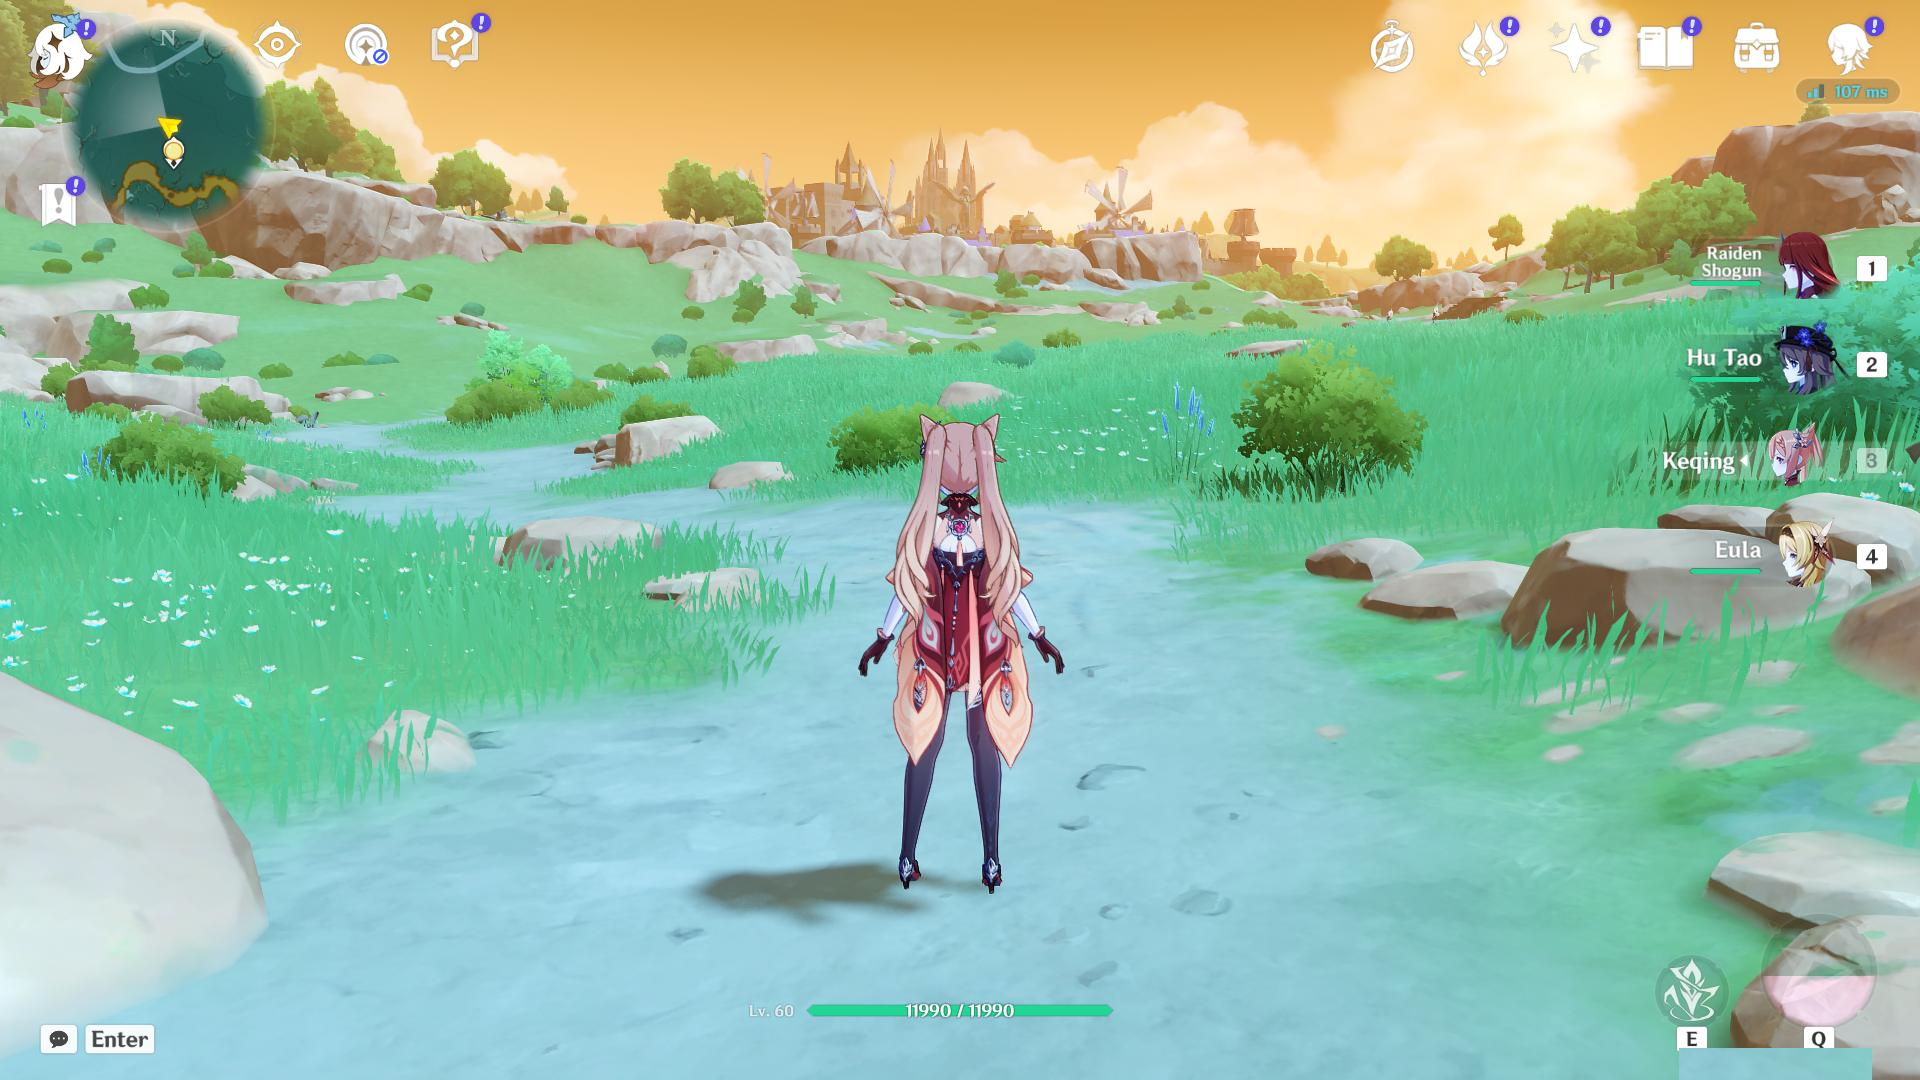

In [13]:
img = cv2.imread('Image_2.png')
showarray(img)

In [14]:
# The kernel to be used for dilation purpose
kernel = np.ones((5, 5), np.uint8)

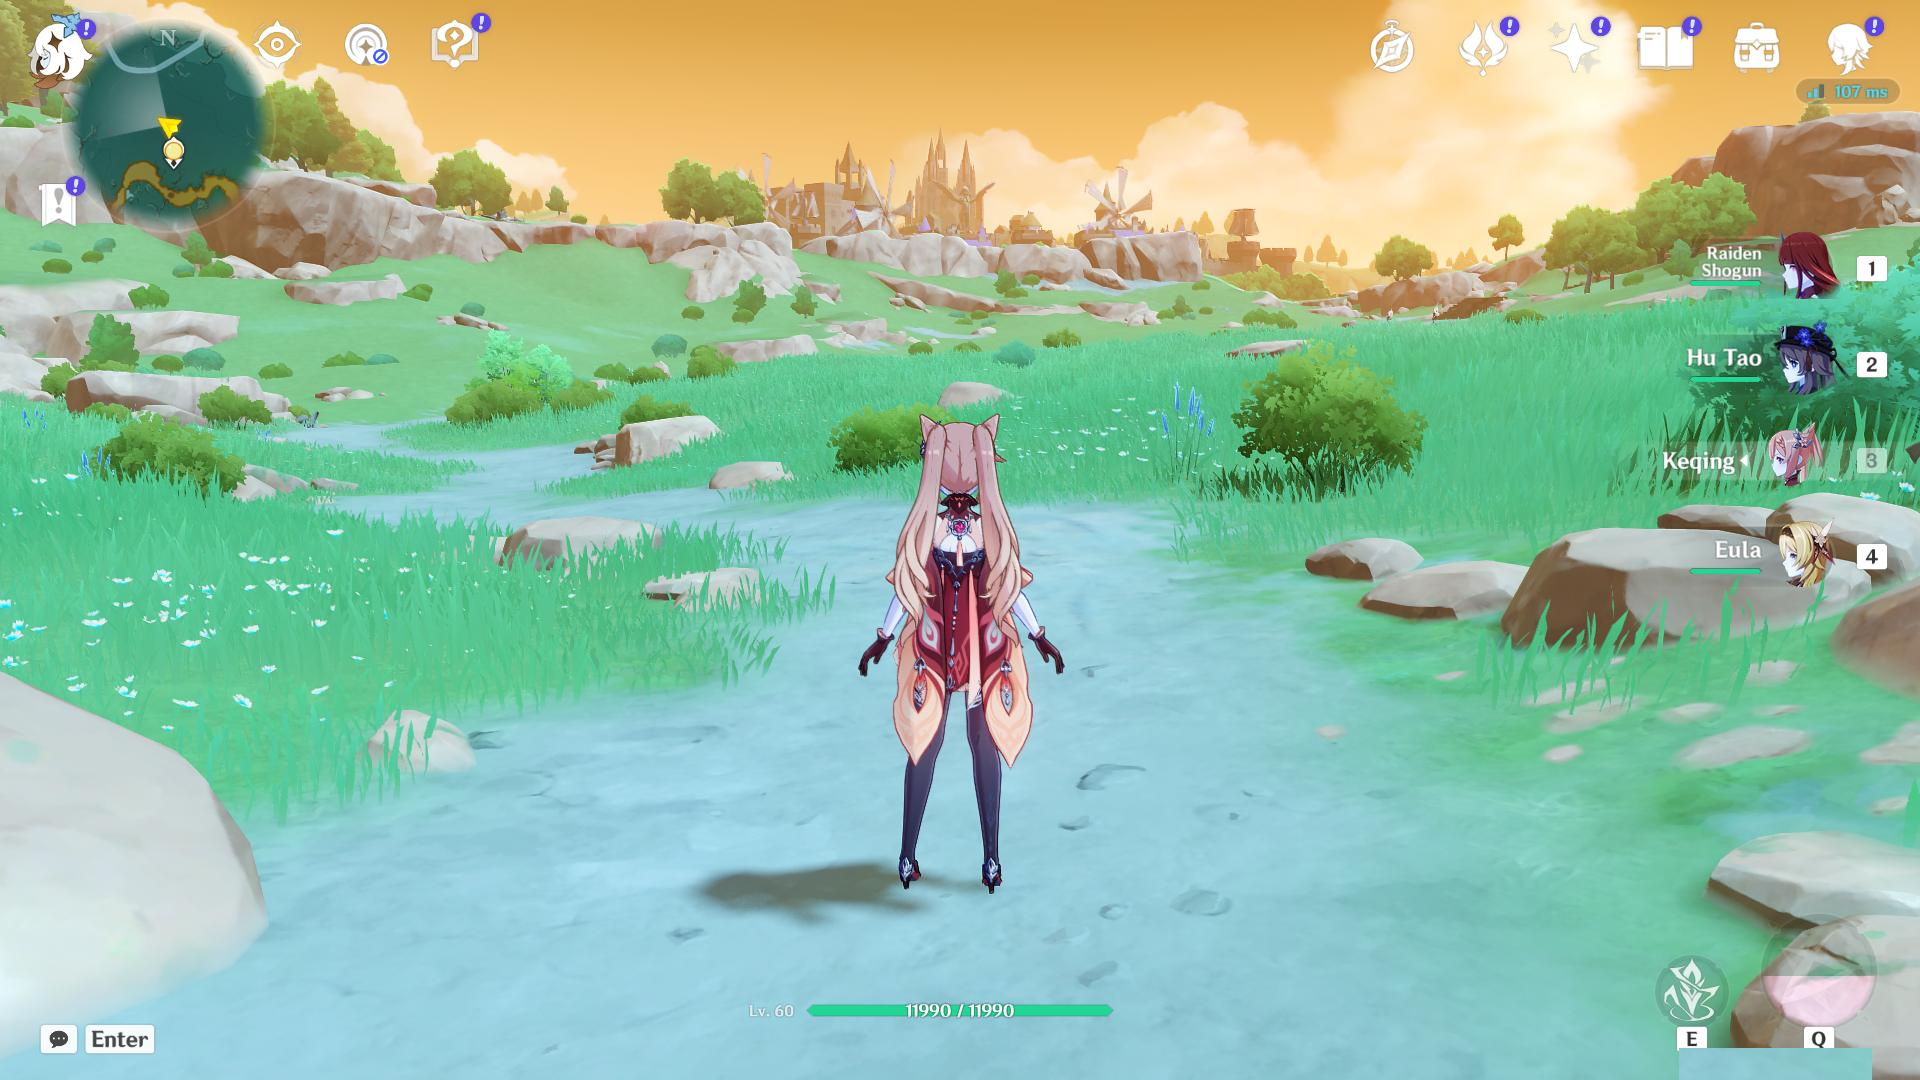

In [15]:
img_float32 = np.float32(img)
showarray(img_float32)

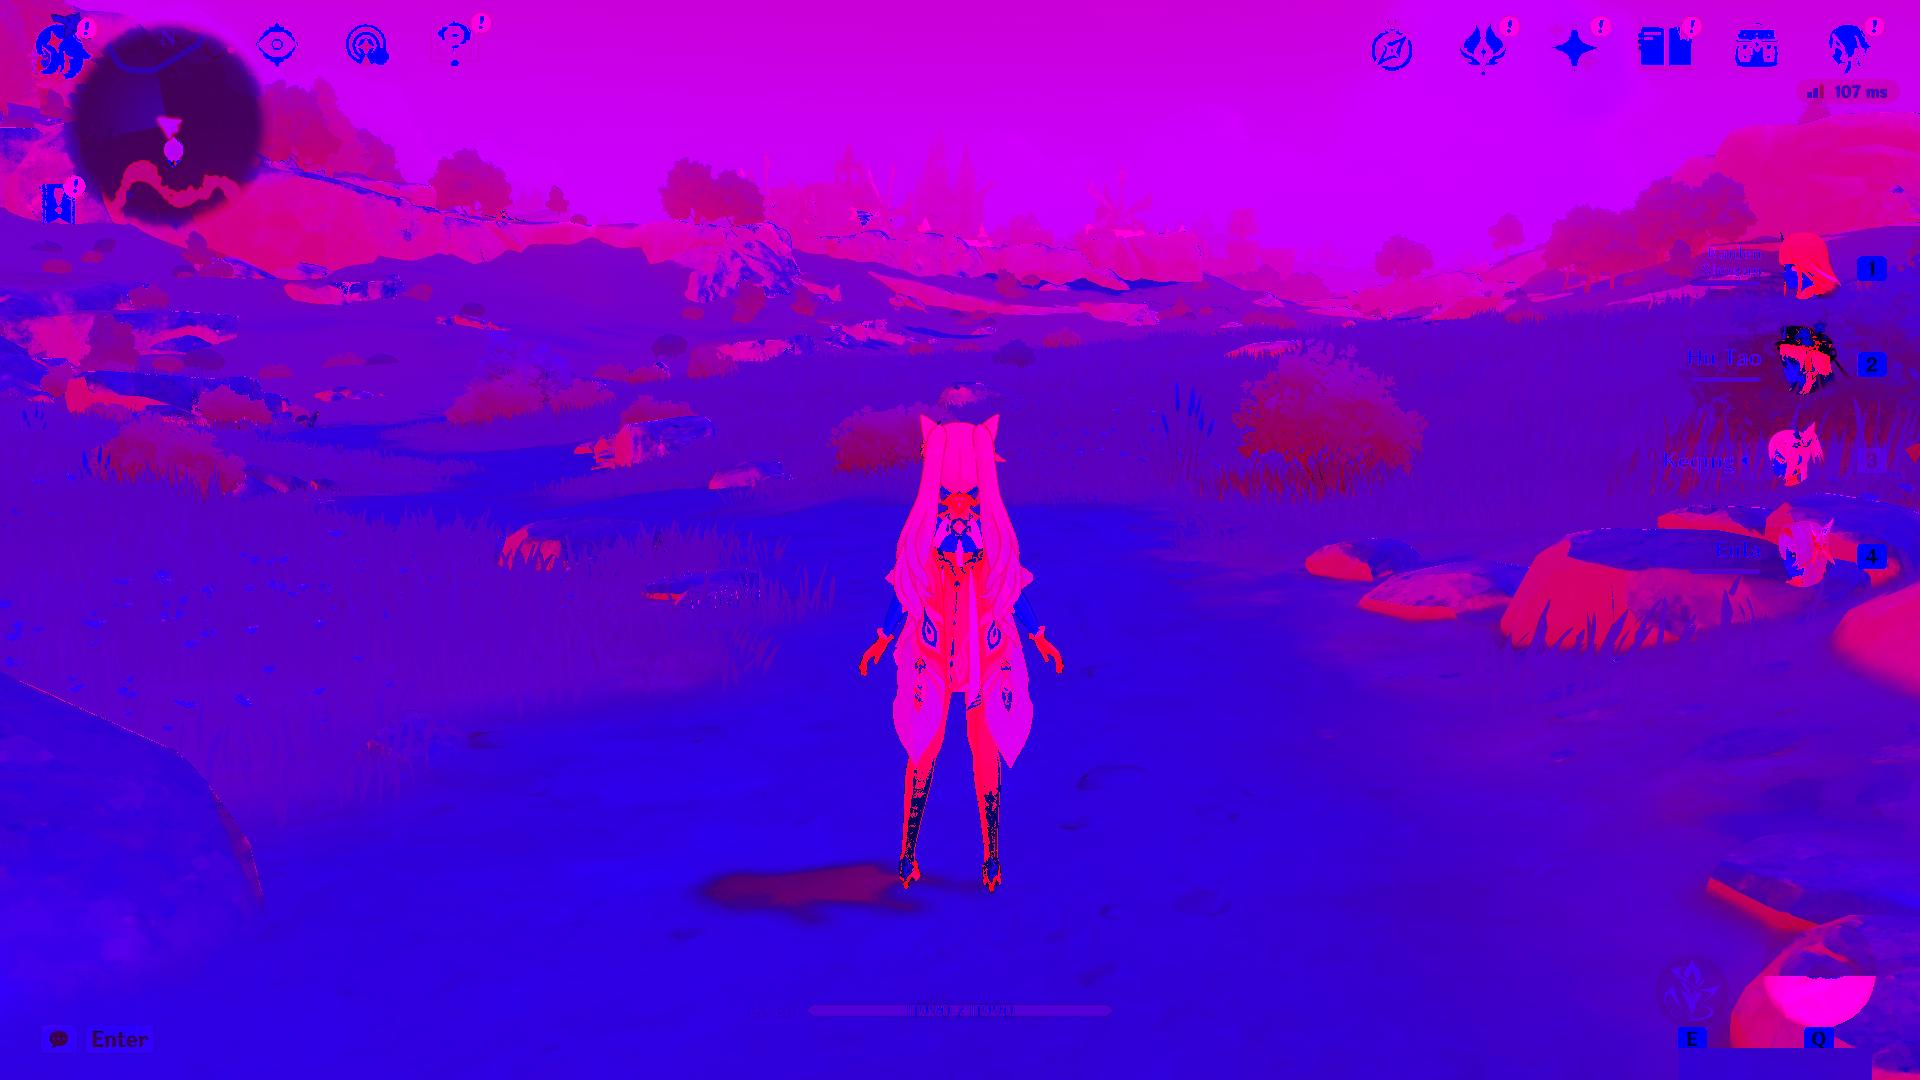

In [16]:
# converting the image to HSV format
hsv = cv2.cvtColor(img_float32, cv2.COLOR_BGR2HSV)
showarray(hsv)

In [17]:
def extraction_mask_color(img):
    # The kernel to be used for dilation 
    # purpose
    kernel = np.ones((5, 5), np.uint8)

    # converting the image to HSV format
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # defining the lower and upper values
    # of HSV, this will detect yellow colour
    Lower_hsv = np.array([20, 70, 100])
    Upper_hsv = np.array([30, 255, 255])

    # creating the mask
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)

    # Inverting the mask 
    mask_yellow = cv2.bitwise_not(Mask)
    Mask = cv2.bitwise_and(img, img, mask = mask_yellow)
    return Mask

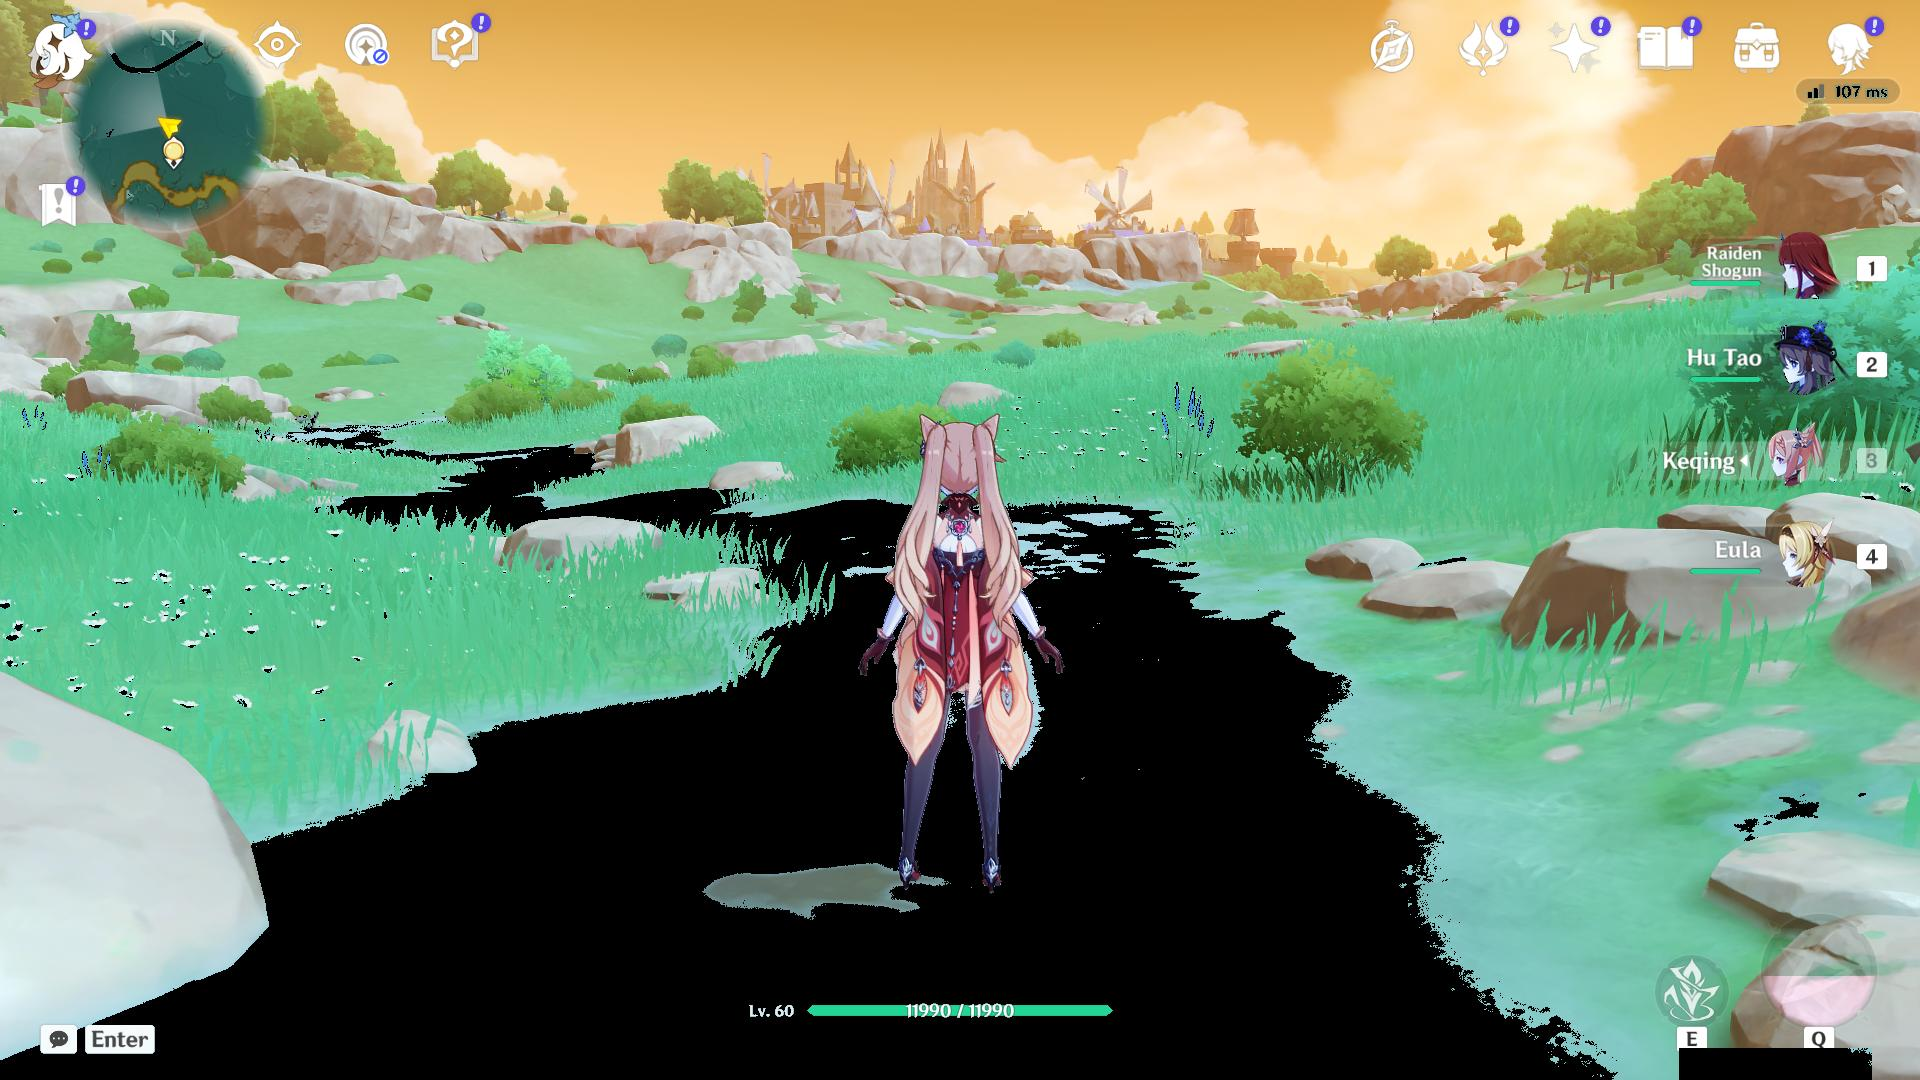

In [18]:
img = cv2.imread('Image_2.png')
img_prepro_after=extraction_mask_color(img)
showarray(img_prepro_after)

# For the Training Dataset

In [19]:
# load dataset
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl') 
x_training_data.index

Int64Index([ 393,  233,  995, 1216, 1132, 1058, 1163,  265,  326, 1322,
            ...
             230, 1154, 1277,  489, 1014,   56,  851,  499, 1220,  102],
           dtype='int64', length=250)

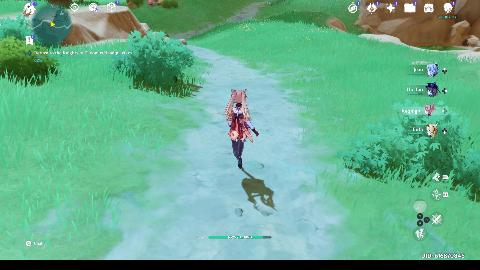

In [20]:
img=df_to_numpy_image(x_training_data,1220)
showarray(img)

In [21]:
img = np.float32(img)

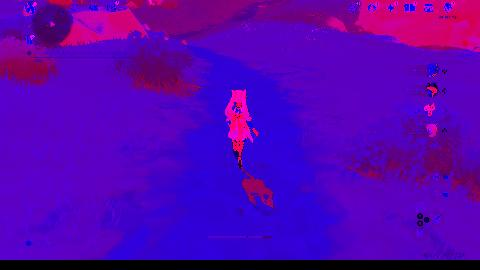

In [22]:
kernel = np.ones((5, 5), np.uint16)
# converting the image to HSV format
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
showarray(hsv)

In [23]:
#pip install ipywidgets

In [24]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

Lower_hsv [127 127 127]
Upper_hsv [127 127 127]


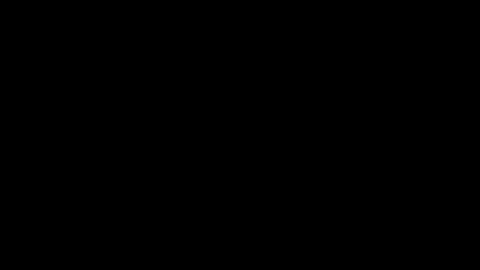

In [25]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(Lower_hsv_1,Lower_hsv_2,Lower_hsv_3, Upper_hsv_1, Upper_hsv_2, Upper_hsv_3):
    # defining the lower and upper values
    # of HSV, this will detect yellow colour
    Lower_hsv = np.array([Lower_hsv_1,Lower_hsv_2, Lower_hsv_3])
    Upper_hsv = np.array([Upper_hsv_1, Upper_hsv_2, Upper_hsv_3])
    # creating the mask
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
    print("Lower_hsv", Lower_hsv)
    print("Upper_hsv", Upper_hsv)
    showarray(Mask)
interactive_plot = interactive(f,  Lower_hsv_1=(0, 255),
                                   Lower_hsv_2=(0, 255),
                                   Lower_hsv_3=(0, 255),
                                   Upper_hsv_1=(0, 255),
                                   Upper_hsv_2=(0, 255),
                                   Upper_hsv_3=(0, 255))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

In [26]:
# defining the lower and upper values
# of HSV, this will detect yellow colour
Lower_hsv = np.array([0,0, 0])
Upper_hsv = np.array([79, 255, 255])

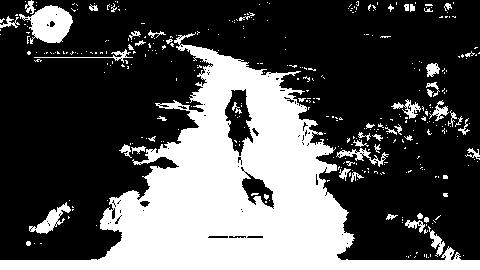

In [27]:
# creating the mask
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
showarray(Mask)

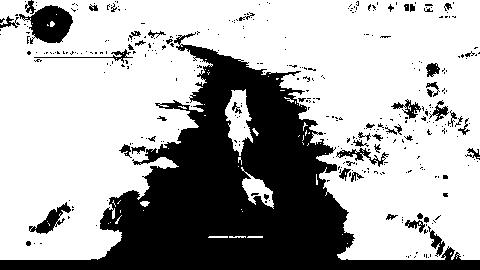

In [28]:
# Inverting the mask 
mask_yellow = cv2.bitwise_not(Mask)
showarray(mask_yellow)

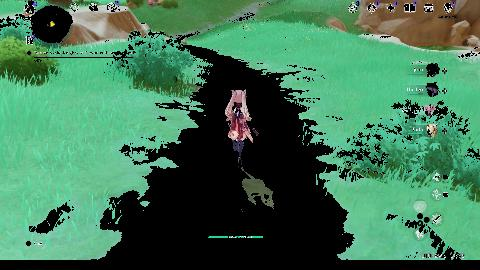

In [29]:
Mask = cv2.bitwise_and(img, img, mask = mask_yellow)
showarray(Mask)

Example N 763
Lower_hsv [127 127 127]
Upper_hsv [127 127 127]


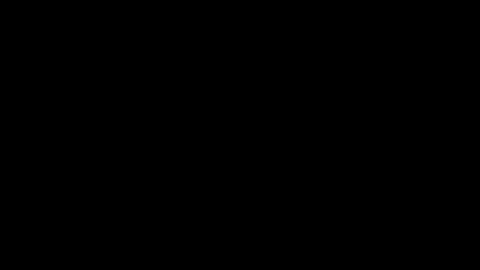

In [30]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
listas=list(x_training_data.index)
def f(Example,Lower_hsv_1,Lower_hsv_2,Lower_hsv_3, Upper_hsv_1, Upper_hsv_2, Upper_hsv_3):
    index =listas[Example]
    img=df_to_numpy_image(x_training_data,index)
    img = np.float32(img)
    kernel = np.ones((5, 5), np.uint16)
    # converting the image to HSV format
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # defining the lower and upper values
    # of HSV, this will detect yellow colour
    Lower_hsv = np.array([Lower_hsv_1,Lower_hsv_2, Lower_hsv_3])
    Upper_hsv = np.array([Upper_hsv_1, Upper_hsv_2, Upper_hsv_3])
    # creating the mask
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
    print("Example N", listas[Example])
    print("Lower_hsv", Lower_hsv)
    print("Upper_hsv", Upper_hsv)
    showarray(Mask)
interactive_plot = interactive(f,  
                                   Example = (0,len(listas)),
                                   Lower_hsv_1=(0, 255),
                                   Lower_hsv_2=(0, 255),
                                   Lower_hsv_3=(0, 255),
                                   Upper_hsv_1=(0, 255),
                                   Upper_hsv_2=(0, 255),
                                   Upper_hsv_3=(0, 255))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

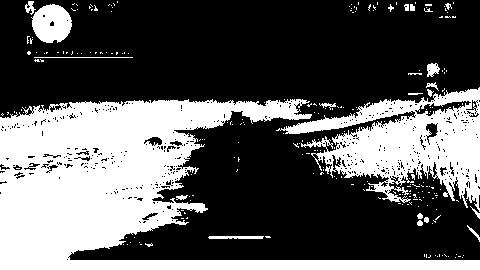

In [31]:
img=df_to_numpy_image(x_training_data,393)
img = np.float32(img)
kernel = np.ones((5, 5), np.uint16)
# converting the image to HSV format
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# defining the lower and upper values
# of HSV, this will detect yellow colour
Lower_hsv = np.array([0,0, 0])
Upper_hsv = np.array([155, 255, 255])
Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
showarray(Mask)


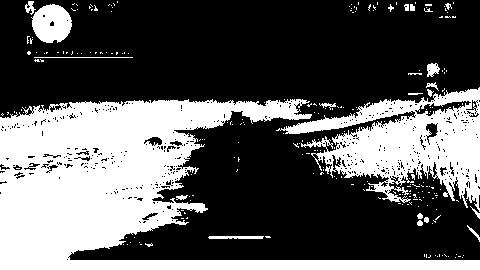

In [32]:
# Inverting the mask 
#mask_yellow = cv2.bitwise_not(Mask)
mask_yellow=Mask
showarray(mask_yellow)

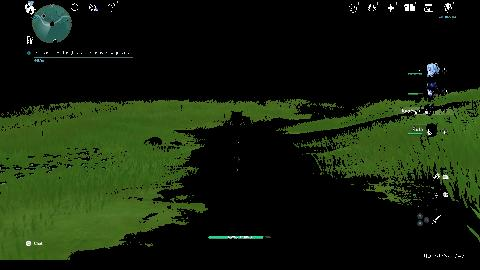

In [33]:
Mask = cv2.bitwise_and(img, img, mask = mask_yellow)
showarray(Mask)

In [24]:
# load dataset
#We load the images of the gameplay
x_training_data=pd.read_pickle('data/dfx-0.pkl')  
#We load the inputs of the of the gameplay
y_training_data=pd.read_pickle('data/dfy-0.pkl')  
X_train, X_valid, y_train, y_valid = train_test_split(x_training_data, y_training_data, test_size=0.2, random_state=6)
# Train Image part ( 4 Dimensional)
X_image = np.array([df_to_numpy_image(X_train,i) for i in X_train.index])
X=X_image.reshape(-1,width,height,3)
#Train Input part ( 1 Dimensional )
Y = [df_to_numpy_input(y_train,i) for i in y_train.index]
# Test Image part ( 4 Dimensional)
test_image = np.array([df_to_numpy_image(X_valid,i) for i in X_valid.index])
test_x=test_image.reshape(-1,width,height,3)
## Test Input part( 1 Dimensional )
test_y = [df_to_numpy_input(y_valid,i) for i in y_valid.index]

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=80)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()